### Objective:

To classify Happy or Sad Emotions in Musical Audio Files using deep learning techniques. Essentially, it is a binary classification framework.

### Problem Statement

To build/develop and implement a deep learning model for the classification of emotional tones between Happy or Sad Emotions in Musical Audio Files dataset.

At the end of this competition, you will be able to:

Load and extract audio features from wave files in the Musical Audio Files dataset using librosa, encompassing MFCC (Mel-Frequency Cepstral Coefficients), Mel spectrogram, and STFT (Short-time Fourier Transform).

Develop a deep learning model utilizing either the Keras or PyTorch deep learning libraries.


### Description:

Dataset Description: The original dataset contains 7 classes but this is just a subset of the original dataset which contains 2 classes. The audio files in the dataset were already preprocessed by converting them into smaller chunks of equal size. All music were divided into 10 seconds smaller chunks using FFMPEG.

The chunks of the same song have the equally spaced names like : Happy20001-Happy20016(Same song) The last two digits resembles the chunk number while the first three digits are the ID of the original song which is provided as the GroupID. The two classes are: 1.)Happy and 2.)Sad


## Grading = 10 Marks

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

### Instructions for downloading train and test data are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at (https://www.kaggle.com/t/c8bda808fac2419d8025370763a90ada) and click on user then click on your profile as shown below. Click Account.

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP.PNG)

### 2. Next, scroll down to the API access section and click on **Create New Token** to download an API key (kaggle.json).

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP_1.PNG)

### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"radhaac","key":"66704ca9ab5c739ec3d94bb6327f302c"}'}

In [ ]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

kaggle.json  sample_data/


### 4. Install the Kaggle API using the following command


In [ ]:
!pip install -U -q kaggle==1.5.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentry-sdk 2.19.2 requires urllib3>=1.26.11, but you have urllib3 1.24.3 which is incompatible.


### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json #run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '403 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [ ]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c to-classify-tones-of-musical-emotion-files
!unzip to-classify-tones-of-musical-emotion-files.zip

100% 641M/641M [00:08<00:00, 238MB/s]
100% 641M/641M [00:08<00:00, 79.1MB/s]
Archive:  to-classify-tones-of-musical-emotion-files.zip
  inflating: Test/Test/1.wav         
  inflating: Test/Test/10.wav        
  inflating: Test/Test/100.wav       
  inflating: Test/Test/101.wav       
  inflating: Test/Test/102.wav       
  inflating: Test/Test/103.wav       
  inflating: Test/Test/104.wav       
  inflating: Test/Test/105.wav       
  inflating: Test/Test/106.wav       
  inflating: Test/Test/107.wav       
  inflating: Test/Test/108.wav       
  inflating: Test/Test/109.wav       
  inflating: Test/Test/11.wav        
  inflating: Test/Test/110.wav       
  inflating: Test/Test/111.wav       
  inflating: Test/Test/112.wav       
  inflating: Test/Test/113.wav       
  inflating: Test/Test/114.wav       
  inflating: Test/Test/115.wav       
  inflating: Test/Test/116.wav       
  inflating: Test/Test/117.wav       
  inflating: Test/Test/118.wav       
  inflating: Test/Test/119.wav

### YOUR CODING STARTS FROM HERE

### Import Neccesary Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import os
from pathlib import Path

import tensorflow as tf
# Enable eager execution to avoid tf.function behavior
tf.config.run_functions_eagerly(True)
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Attention, Dense, ReLU, BatchNormalization, Dropout, Input, Conv1D, GlobalAveragePooling1D, MaxPooling1D, GlobalMaxPooling1D, Concatenate, Add
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tqdm import tqdm

import librosa
import soundfile as sf

### **Stage 1:** Load the Train data audio files (1 point)




In [ ]:
# Directory that holds the data for each class
data_dir_train = './Train/Train'
data_dir_test = './Test/Test'

data_dir_train_happy = os.path.join(data_dir_train, 'Happy')
data_dir_train_sad = os.path.join(data_dir_train, 'Sad')

# os.listdir returns a list containing all files under the given dir
print(f"There are {len(os.listdir(data_dir_train_happy))} audio files of happy in train dataset.")
print(f"There are {len(os.listdir(data_dir_train_sad))} audio files of sad in train dataset.")
print(f"There are {len(os.listdir(data_dir_test))} audio files of happy and sad in test dataset.")

There are 828 audio files of happy in train dataset.
There are 1045 audio files of sad in train dataset.
There are 253 audio files of happy and sad in test dataset.


#### Play the sample audio

In [ ]:
# Get the filenames for happy and sad audio files
happy_filenames = [os.path.join(data_dir_train_happy, filename) for filename in os.listdir(data_dir_train_happy)]
sad_filenames = [os.path.join(data_dir_train_sad, filename) for filename in os.listdir(data_dir_train_sad)]

print("Sample happy audio")
audio_happy = ipd.Audio(filename='./Train/Train/Happy/Happy36514.wav', rate=48000)
ipd.display(audio_happy)

print()
print("Sample sad audio")
audio_sad = ipd.Audio(filename=sad_filenames[1], rate=48000)
ipd.display(audio_sad)

Sample happy audio



Sample sad audio


### **Stage 2:** Data Exploration and Visualization (1 point)


*  Find count of each label and plot bar graph



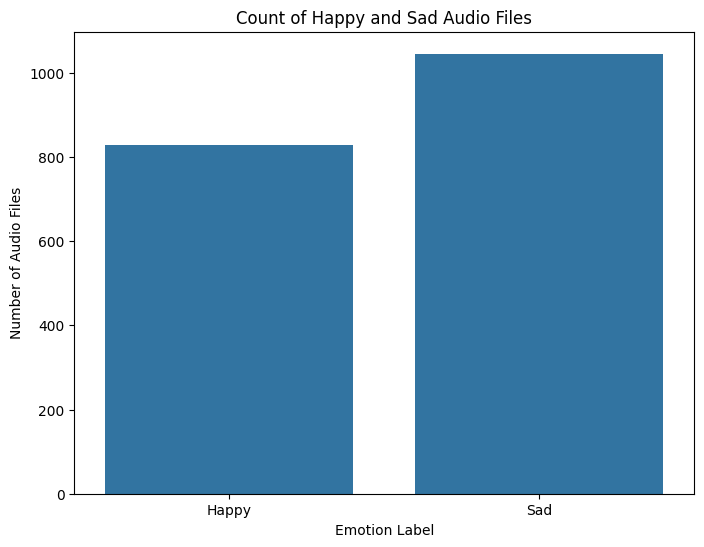

In [ ]:
# Count the number of happy and sad audio files
happy_count = len(os.listdir(data_dir_train_happy))
sad_count = len(os.listdir(data_dir_train_sad))

# Create a bar plot
labels = ['Happy', 'Sad']
counts = [happy_count, sad_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts)
plt.title('Count of Happy and Sad Audio Files')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Audio Files')
plt.show()

#### Visualize sample audio signal using librosa

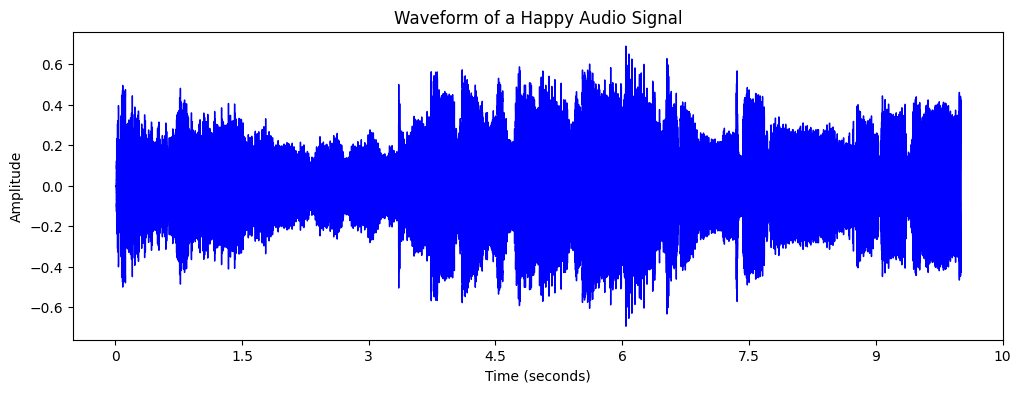

In [ ]:
data, sampling_rate = librosa.load('./Train/Train/Happy/Happy36514.wav')

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate, color='blue')
plt.title('Waveform of a Happy Audio Signal') # Added title for clarity
plt.xlabel('Time (seconds)') # Added x label for clarity
plt.ylabel('Amplitude') # Added y label for clarity
plt.show()

### **Stage 3:** Feature extraction (2 points)


In [ ]:
# clean audio data set
def pad_or_truncate(audio, target_length, sr):
    target_samples = target_length * sr
    if len(audio) < target_samples:
        padding = target_samples - len(audio)
        audio = np.pad(audio, (0, padding), mode='constant')
    else:
        audio = audio[:target_samples]
    return audio

def resample_audio(file, target_sr=16000):
    audio, sr = librosa.load(file, sr=None)
    if sr != target_sr:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    return audio, target_sr

def remove_silence(audio, sr, top_db=20):
    intervals = librosa.effects.split(audio, top_db=top_db)
    cleaned_audio = np.concatenate([audio[start:end] for start, end in intervals])
    return cleaned_audio


In [ ]:
# feature extraction
def extract_features(file_name):
    try:
        # audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        audio, sample_rate = librosa.load(file_name)
        audio = pad_or_truncate(audio, 8, sample_rate)
        audio, target_sr = resample_audio(file_name, target_sr=16000)
        cleaned_audio = remove_silence(audio, target_sr, top_db=20)

        mfccs = librosa.feature.mfcc(y=cleaned_audio, sr=target_sr, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T,axis=0)

        # Mel-spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=cleaned_audio, sr=target_sr)
        mel_spectrogram_processed = np.mean(mel_spectrogram.T,axis=0)

        # Short-Time Fourier Transform (STFT)
        stft = np.abs(librosa.stft(cleaned_audio))
        stft_processed = np.mean(stft.T, axis=0)

        return mfccs_processed, mel_spectrogram_processed, stft_processed
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None, None, None

In [ ]:
# Create empty lists to store features and labels
features = []
labels = []

# Process happy audio files
for filename in tqdm(os.listdir(data_dir_train_happy)):
    filepath = os.path.join(data_dir_train_happy, filename)
    mfccs, mel_spectrogram, stft = extract_features(filepath)
    if mfccs is not None:
      features.append(np.concatenate((mfccs, mel_spectrogram, stft)))
      labels.append(1)  # 1 represents 'Happy'

# Process sad audio files
for filename in tqdm(os.listdir(data_dir_train_sad)):
    filepath = os.path.join(data_dir_train_sad, filename)
    mfccs, mel_spectrogram, stft = extract_features(filepath)
    if mfccs is not None:
      features.append(np.concatenate((mfccs, mel_spectrogram, stft)))
      labels.append(0) # 0 represents 'Sad'

# Create pandas DataFrame
train_df = pd.DataFrame(features)
train_df['labels'] = labels

  1%|▏         | 11/828 [00:04<02:33,  5.34it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=768
  warnings.warn(
 47%|████▋     | 391/828 [01:26<01:25,  5.11it/s]<ipython-input-4-0c95b2c3d08c>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-3-47180ea4945b>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.

In [ ]:
# Convert data to NumPy arrays
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
X_train = train_df.drop('labels', axis=1).values
y_train = train_df['labels'].values
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

### **Stage 4:** Train the model  (4 points)


In [ ]:
# Define hyperparameters
input_size = train_df.shape[1] - 1  # Number of features
num_classes = 2  # Number of classes (Happy or Sad)
num_epochs = 30
lr = 0.001
batch_size = 64

In [ ]:
# Define the model
input_layer = Input((None, input_size))
# Conv1D layers with ReLU activation
x = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)
x = Dropout(0.25)(x)

avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = Concatenate()([avg_pool, max_pool])

x = Dense(64, activation='relu', kernel_regularizer=l2(0.02))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128, activation='relu', kernel_regularizer=l2(0.02))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Fully connected output layer
output_layer = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Build and compile the model
model8 = Model(inputs=input_layer, outputs=output_layer)
model8.compile(optimizer=Adam(learning_rate=lr), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
# ReduceLROnPlateau to increase learning rate when val_accuracy doesn't improve
decrease_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.85,
    patience=2,
    min_lr=1e-6
)

In [ ]:
# fit the model
history=   model8.fit(X_train, y_train, epochs=30, batch_size=batch_size, validation_split=0.2, callbacks=[decrease_lr], shuffle=True)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.5904 - loss: 4.5701 - val_accuracy: 0.6853 - val_loss: 3.9159 - learning_rate: 0.0010
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.6645 - loss: 3.9473 - val_accuracy: 0.7147 - val_loss: 3.5045 - learning_rate: 0.0010
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.7239 - loss: 3.4666 - val_accuracy: 0.7093 - val_loss: 3.1618 - learning_rate: 0.0010
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.7423 - loss: 3.0685 - val_accuracy: 0.7813 - val_loss: 2.8077 - learning_rate: 0.0010
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.7539 - loss: 2.7580 - val_accuracy: 0.8027 - val_loss: 2.5276 - learning_rate: 0.0010
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.7785 - loss: 2.4596 - val_accuracy: 0.7973 - val_loss: 2.2697 - learning_rate: 0.0010
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.8021 - loss: 2.1807 - val_accurac

### **Stage 5:** Kaggle Testset predictions (2 points)



*   Load the test set and extract the features of the .wav files
*   Using the trained model get the predicions on the test set
*   Finally, upload your predictions to the kaggle



In [ ]:
# feature extrraction  on test dataset and prediction
test_feature = []

for filename in tqdm(os.listdir(data_dir_test)):
    filepath = os.path.join(data_dir_test, filename)
    mfccs, mel_spectrogram, stft = extract_features(filepath)
    if mfccs is not None:
      feature = np.concatenate((mfccs, mel_spectrogram, stft))
      feature = feature.reshape(1, 1, feature.shape[0])
      test_outputs = model8.predict(feature, verbose=0)
      predicted = tf.argmax(test_outputs, axis=1).numpy()
      test_feature.append([filename, predicted])

test_df = pd.DataFrame(test_feature, columns=["File Name", "Target"])

  4%|▎         | 9/253 [00:03<01:07,  3.62it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=836
  warnings.warn(
 84%|████████▍ | 212/253 [01:00<00:11,  3.57it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=768
  warnings.warn(
100%|██████████| 253/253 [01:12<00:00,  3.49it/s]


In [ ]:
test_df['Target'] = test_df['Target'].apply(lambda x: x[0])

In [ ]:
test_df['Target'] = np.where(test_df['Target'] == 1, 'Happy', 'Sad')
test_df.head()

,File Name,Target
0,131.wav,Sad
1,235.wav,Sad
2,247.wav,Sad
3,224.wav,Sad
4,220.wav,Sad


In [ ]:
test_df.to_csv('output18.csv', index=False)

In [ ]:
# upload predictions to kaggle
!kaggle competitions submit -c to-classify-tones-of-musical-emotion-files -f output18.csv -m "v18"